In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

df = pd.read_csv('/content/preprocessing.csv')

df.head()

,Rent day,Time,month,temp,rain,windspeed,humidity,snow,total count
0,2020-07-01,0,july,18.9,0.0,3.0,87,0.0,26.0
1,2020-07-01,1,july,18.8,0.0,3.0,87,0.0,9.0
2,2020-07-01,2,july,18.7,0.0,3.0,87,0.0,7.0
3,2020-07-01,3,july,18.4,0.0,2.3,86,0.0,7.0
4,2020-07-01,4,july,18.2,0.0,1.2,86,0.0,4.0


In [97]:
df_new = df.groupby('Rent day').mean()

df_new.head()

,Time,temp,rain,windspeed,humidity,snow,total count
Rent day,,,,,,,
2020-07-01,11.5,20.975000,0.000000,1.995833,79.166667,0.0,119.375000
2020-07-02,11.5,24.029167,0.000000,2.020833,74.333333,0.0,125.916667
2020-07-03,11.5,25.658333,0.000000,2.554167,63.333333,0.0,120.625000
2020-07-04,11.5,24.008333,0.070833,2.170833,66.333333,0.0,138.583333
2020-07-05,11.5,23.683333,0.000000,1.966667,68.000000,0.0,142.625000


In [105]:
df_weather = df_new[['temp','rain','windspeed','humidity','snow']]

df_weather.head()

df_weather = df_weather.astype('int')

df_y = df_new[['total count']]

df_y.head()

df_y = df_y.astype('int')


,temp,rain,windspeed,humidity,snow
Rent day,,,,,
2020-07-01,20,0,1,79,0
2020-07-02,24,0,2,74,0
2020-07-03,25,0,2,63,0
2020-07-04,24,0,2,66,0
2020-07-05,23,0,1,68,0


In [99]:
#test, train data split
x_train, x_test, y_train, y_test = train_test_split(df_weather,df_y, test_size=0.3, random_state=20)

len(x_train),len(x_test)

(223, 96)

In [100]:
#모델 생성

model = KNeighborsClassifier(n_neighbors=4)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


In [101]:
#confusion_matrix
con_matrix = confusion_matrix(y_test,y_pred)
con_matrix


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [102]:
#report
report = classification_report(y_test,y_pred)
report

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           2       0.00      0.00      0.00       1.0\n           5       0.00      0.00      0.00       1.0\n           6       0.00      0.00      0.00       0.0\n           7       0.00      0.00      0.00       1.0\n          11       0.00      0.00      0.00       2.0\n          12       0.00      0.00      0.00       1.0\n          13       0.00      0.00      0.00       1.0\n          14       0.00      0.00      0.00       1.0\n          16       0.00      0.00      0.00       0.0\n          17       0.00      0.00      0.00       0.0\n          18       0.00      0.00      0.00       0.0\n          19       0.00      0.00      0.00       1.0\n          20       0.00      0.00      0.00       1.0\n          21       0.00      0.00      0.00       2.0\n          22       0.00      0.00      0.00       2.0\n          23       0.00      0.00      0.00       0.0\n          24       0.00      0.00      0.00       1.0\n       

In [103]:
#accuracy
print('accuracy: {:.2f}'.format(model.score(x_test,y_test)))

accuracy: 0.00


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


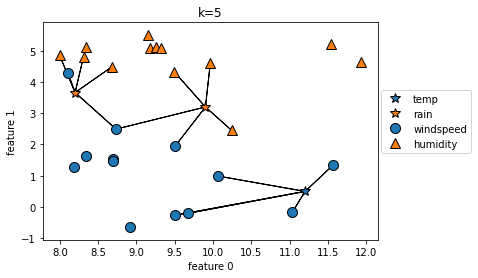

In [77]:
import mglearn


mglearn.plots.plot_knn_classification(n_neighbors=5)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.title('k=5')
plt.legend(df_weather,loc=(1.01,0.4))
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sampl

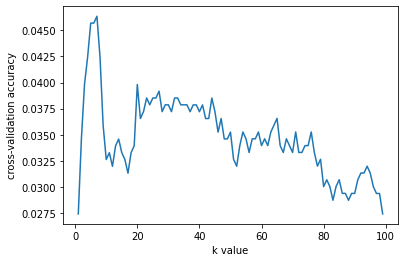

In [66]:
#k값 찾기
from sklearn.model_selection import cross_val_score

k_range = range(1,100)
k_scores = []

for k in k_range:
  knn = KNeighborsClassifier(k)
  scores = cross_val_score(knn, x_test,y_test, cv=10, scoring ="accuracy")
  k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('k value')
plt.ylabel('cross-validation accuracy')
plt.show()